Please get this notebook using the following link: https://tinyurl.com/3brthb45

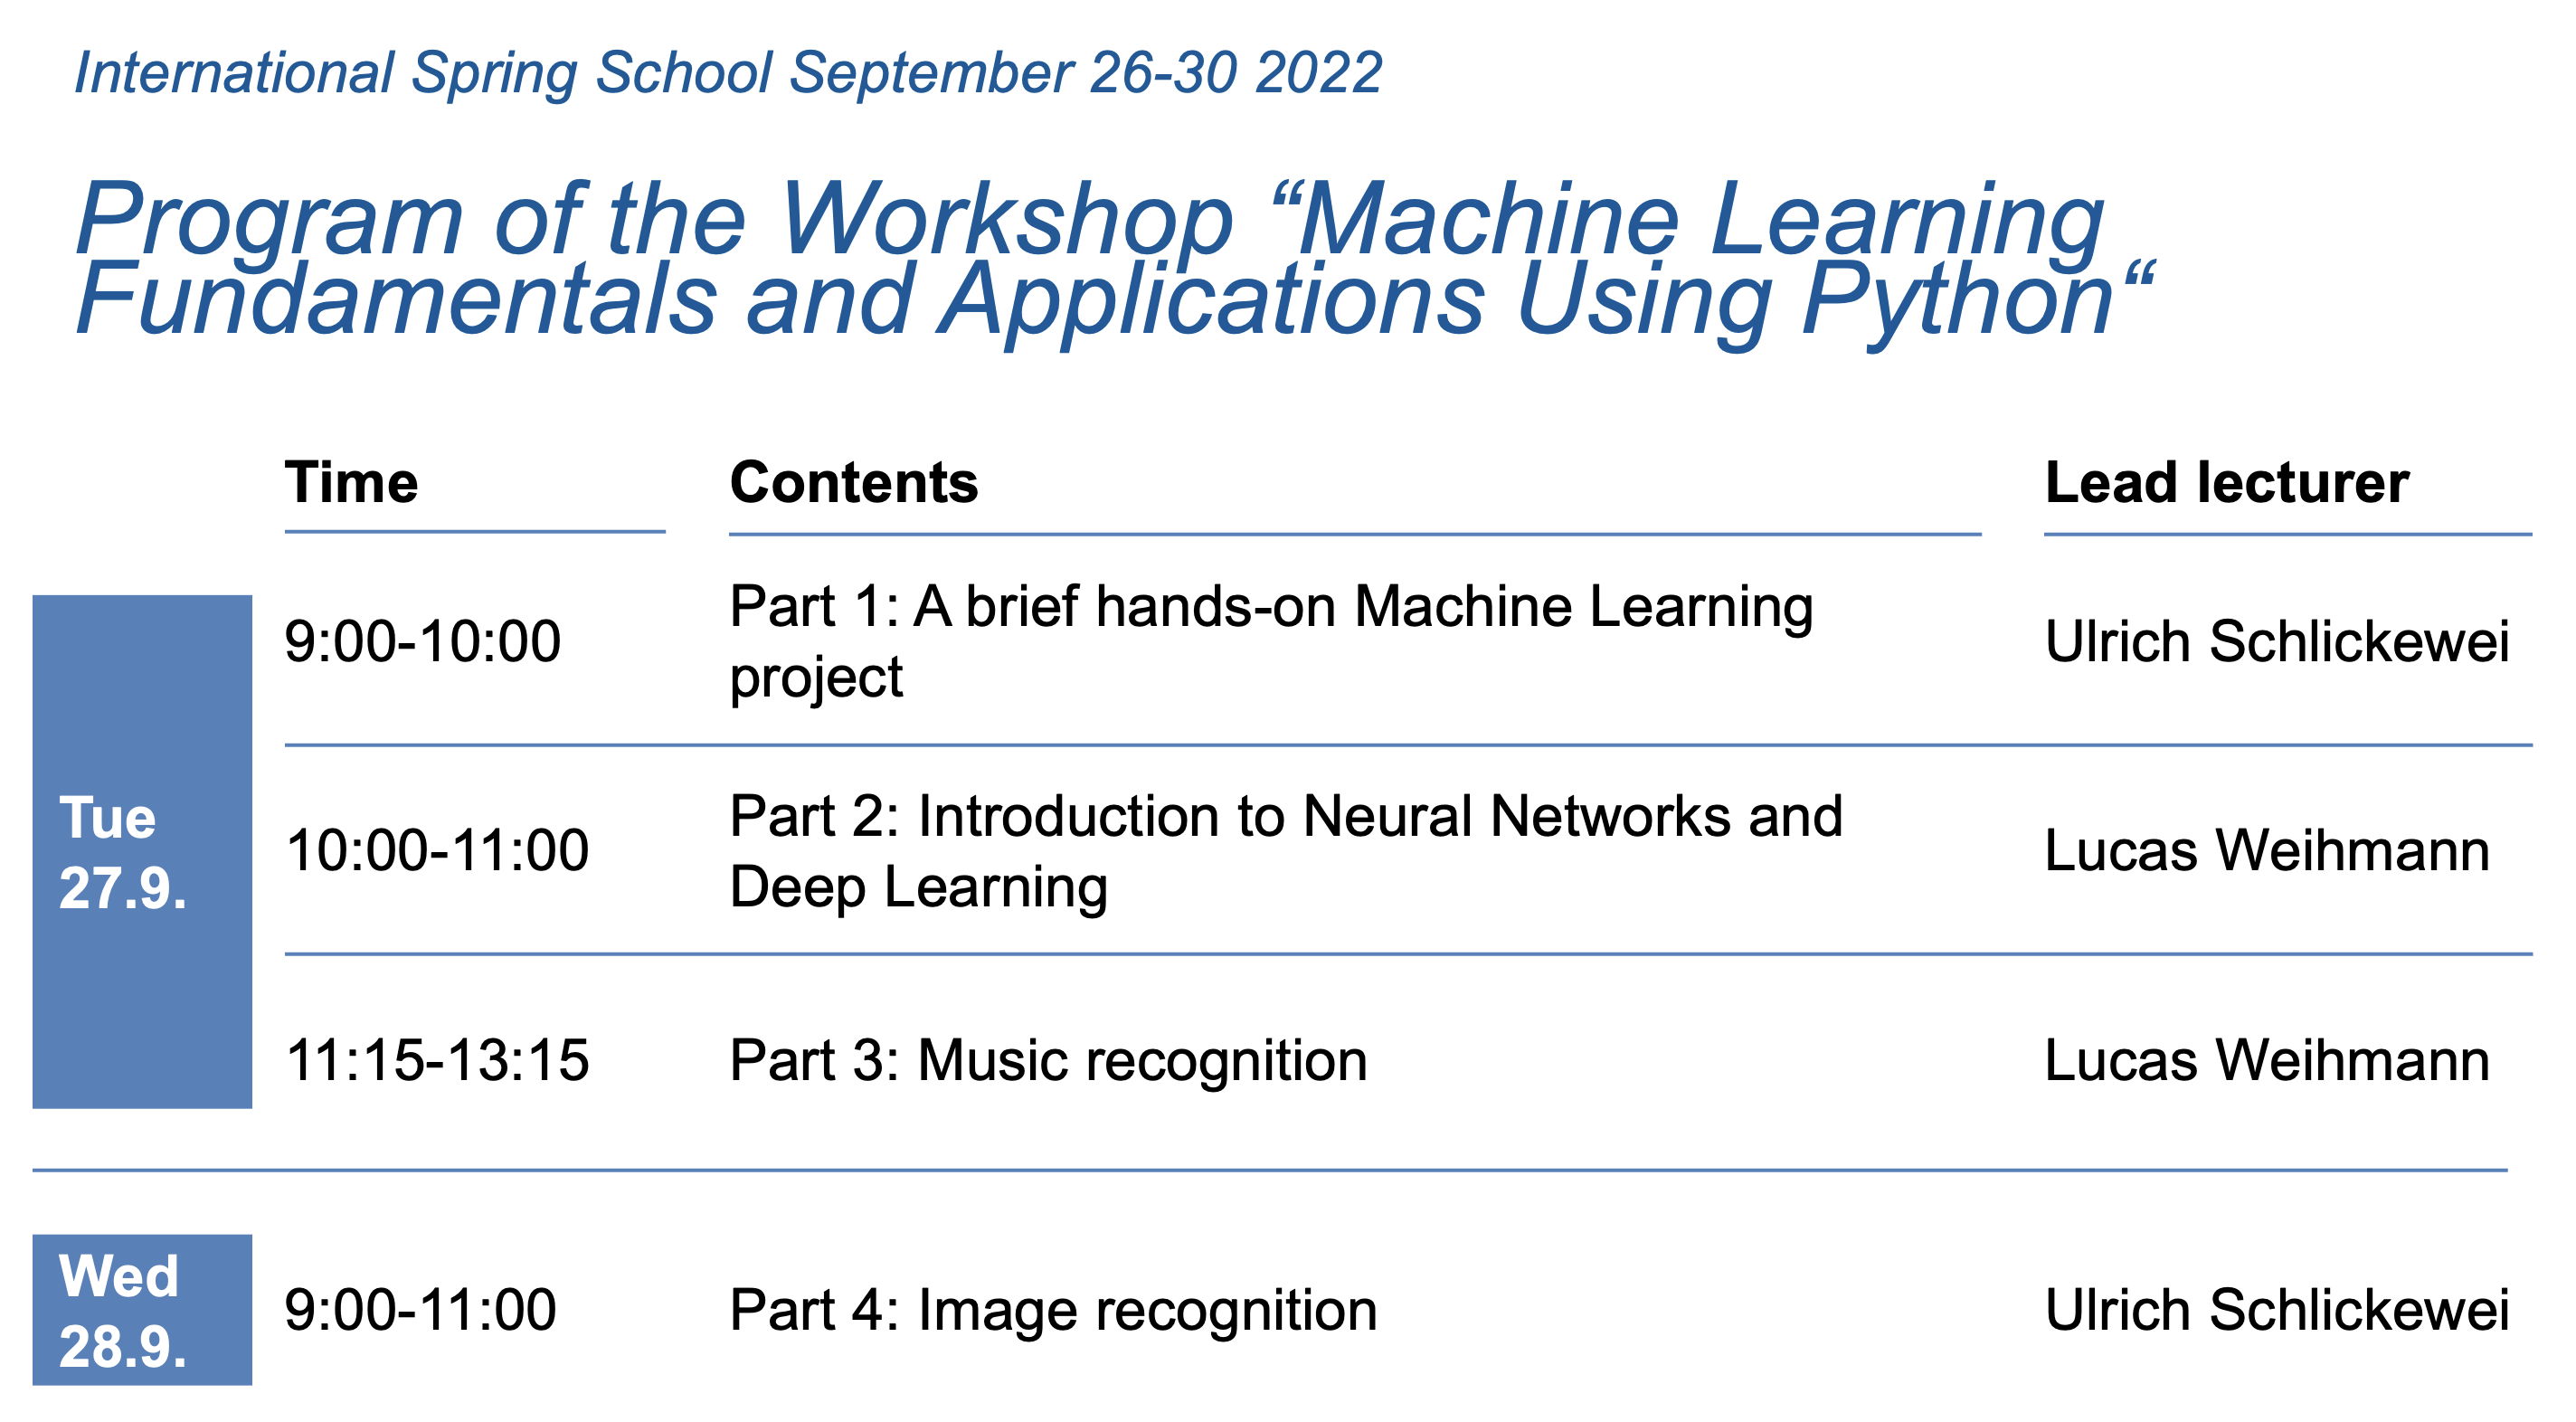

# Part 1: A brief hands-on Machine Learning Project

After this first part you are in a position to:
* Do some basic programming in Python using Juypter Notebooks and Google Colab
* Explain the lifecycle of a Machine Learning project: data selection and cleaning, exploratory data analysis, feature engineering, and model selection
* Acknowledge the importance of packages such as Pandas and Scikitlearn to process data and fit regression models

This part is inspired by:
* Chapter 2 from Aurelion Gérons textbook ["Hands-on Machine Learning with Scikit-Learn and Tensorflow"](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).
* Berkeley's [Data 100 class](https://ds100.org/) from where we took the dataset, the task and parts of the code.

## 0) A very very short intro to Python, Jupyter Notebooks and Colab

### 0.1: Jupyter Notebooks

A Jupyter Notebook is a basically a nice looking web interface for the interactive Python interpreter. Interactive coding differs from classical coding. Instead of executing the whole program at once, you can execute small code cells in a sequential way. You can think of Jupyter Notebook as a chalk board. With each code cell, we we write something onto the chalk board. As long as we don't restart Notebook (=wiping the chalk board), we keep the changes made to our Notebook. This especially means that we don't have to execute previous code cells again and again if we make changes in subsequent cells. This also means that we have to execute previous code cells again (=overwriting the text written onto the chalk board) if we made changes to them.

Jupyter Notebooks also allow text cells. With the text cells, we can create interactive code stories in which you can play around and experiment with the theory provided in the text cell. There even exist whole books written as Jupyter Notebooks!

#### Text cells
In a notebook, each rectangle containing text or code is called a *cell*.

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to learn Markdown, but you might want to.

After you edit a text cell, click the "run cell" button at the top that looks like ▶| or hold down `shift` + `return` to confirm any changes. (Try not to delete the instructions of the lab.)

#### Code cells
Other cells contain code in the Python 3 language. Running a code cell will execute all of the code it contains.

To run the code in a code cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle.  Next, either press ▶| or hold down `shift` + `return`.

Try running this cell:

In [ ]:
print("Hello, World!")

### 0.2: Google Colab

Google Colab is a freemium cloud service based on Jupyter notebooks. It provides a virtual machine (VM) in which a Jupyter notebook can be executed, even with hardware acceleration like GPUs. The whole process is similar to Google borrowing us one of its computers. We can access this borrowed computer through this browser window which shows a Jupyter Notebook running on Google's serves.

### 0.3: Some words about Python

Python is a high-level programming language with a very user-friendly syntax. Many open-source tools for Data Science and Machine Learning are available in Python which makes it by far the most important language in this field.

Let's quickly browse through some of the basics of Python. You can declare a variable without specifying the type.

In [ ]:
a = 1
type(a)

In [ ]:
a+= 1.0
type(a)

Here is an example of how an *iteration* works in Python:

In [ ]:
sum = 0
n = 5
for i in range(n):
    print('Adding ', i)
    sum += i
print('Sum of the first ', n-1, ' natural numbers is equal to ', sum)

Conditional statements work as expected:

In [ ]:
if sum > 15:
    print('The sum is greater than 15.')
elif sum > 5:
    print('The sum is greater than 5.')
else:
    print('The sum is smaller than or equal to 5.')

Finally, we present an example of defining a function which given an input $n$ computes the sum $\sum_{i=1}^n i$.

In [ ]:
def sum_numbers(n):
    sum = 0
    for i in range(n+1):
        sum+=i
    return sum

sum_numbers(10)

#### Exercise: 
Write a function `my_factorial(n)` that computes $n! = n \cdot (n-1) \cdot \ldots \cdot 1$ for a given natural number $n$.

*Hint*: You need to make sure that your `range()` in the iteration starts at the right number. See the [documentation](https://docs.python.org/3/library/stdtypes.html#typesseq-range).

In [ ]:
#Put your anser here
...

# Uncomment the line below and test if your result is 6
# my_factorial(3) 

Obviously, Python provides a module which implements the factorial function, the `math` module. We can get this using the namespace `math` with the keyword `import`. Functions from the `math` module such as `factorial()` can then be called using the command `math.factorial(n)`.

In [ ]:
import math
math.factorial(3)

## The Machine Learning project lifecycle

Now we get back to our small ML project. We start by loading the most important modules we will need later.

In [1]:
import os

# Check if Notebook is running on Google Colab
import sys
IS_COLAB = "google.colab" in sys.modules

# Import Data Science packages needed in this Notebook
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns

We subdivide the Machine Learning lifecycle in 6 steps

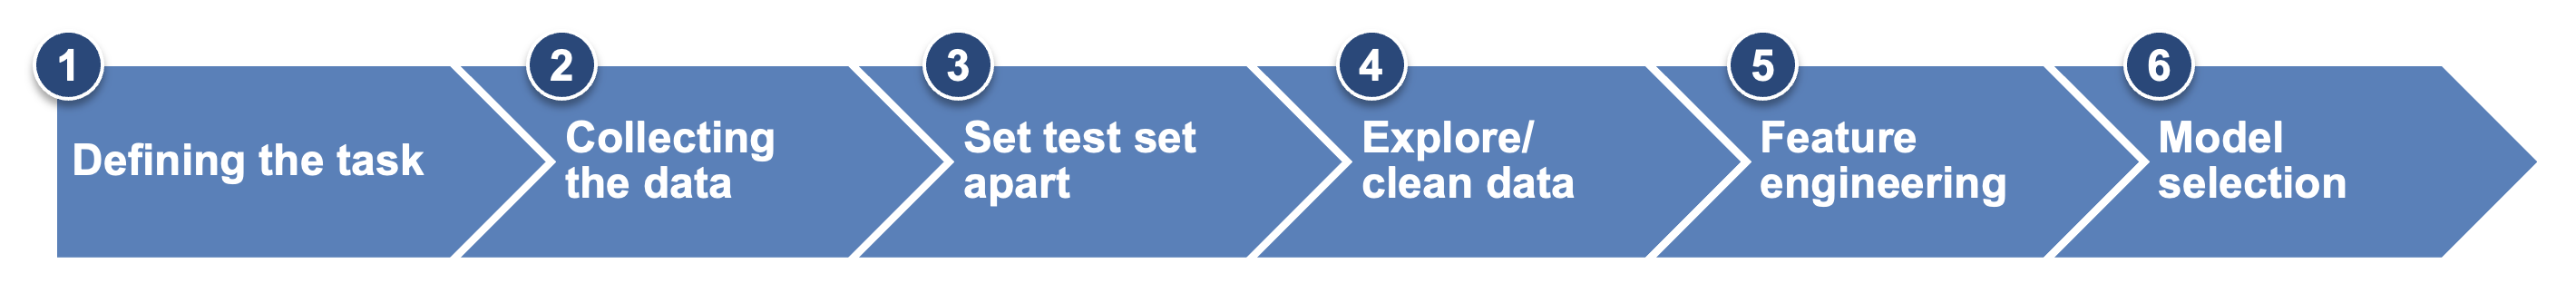

## 1) Defining our task

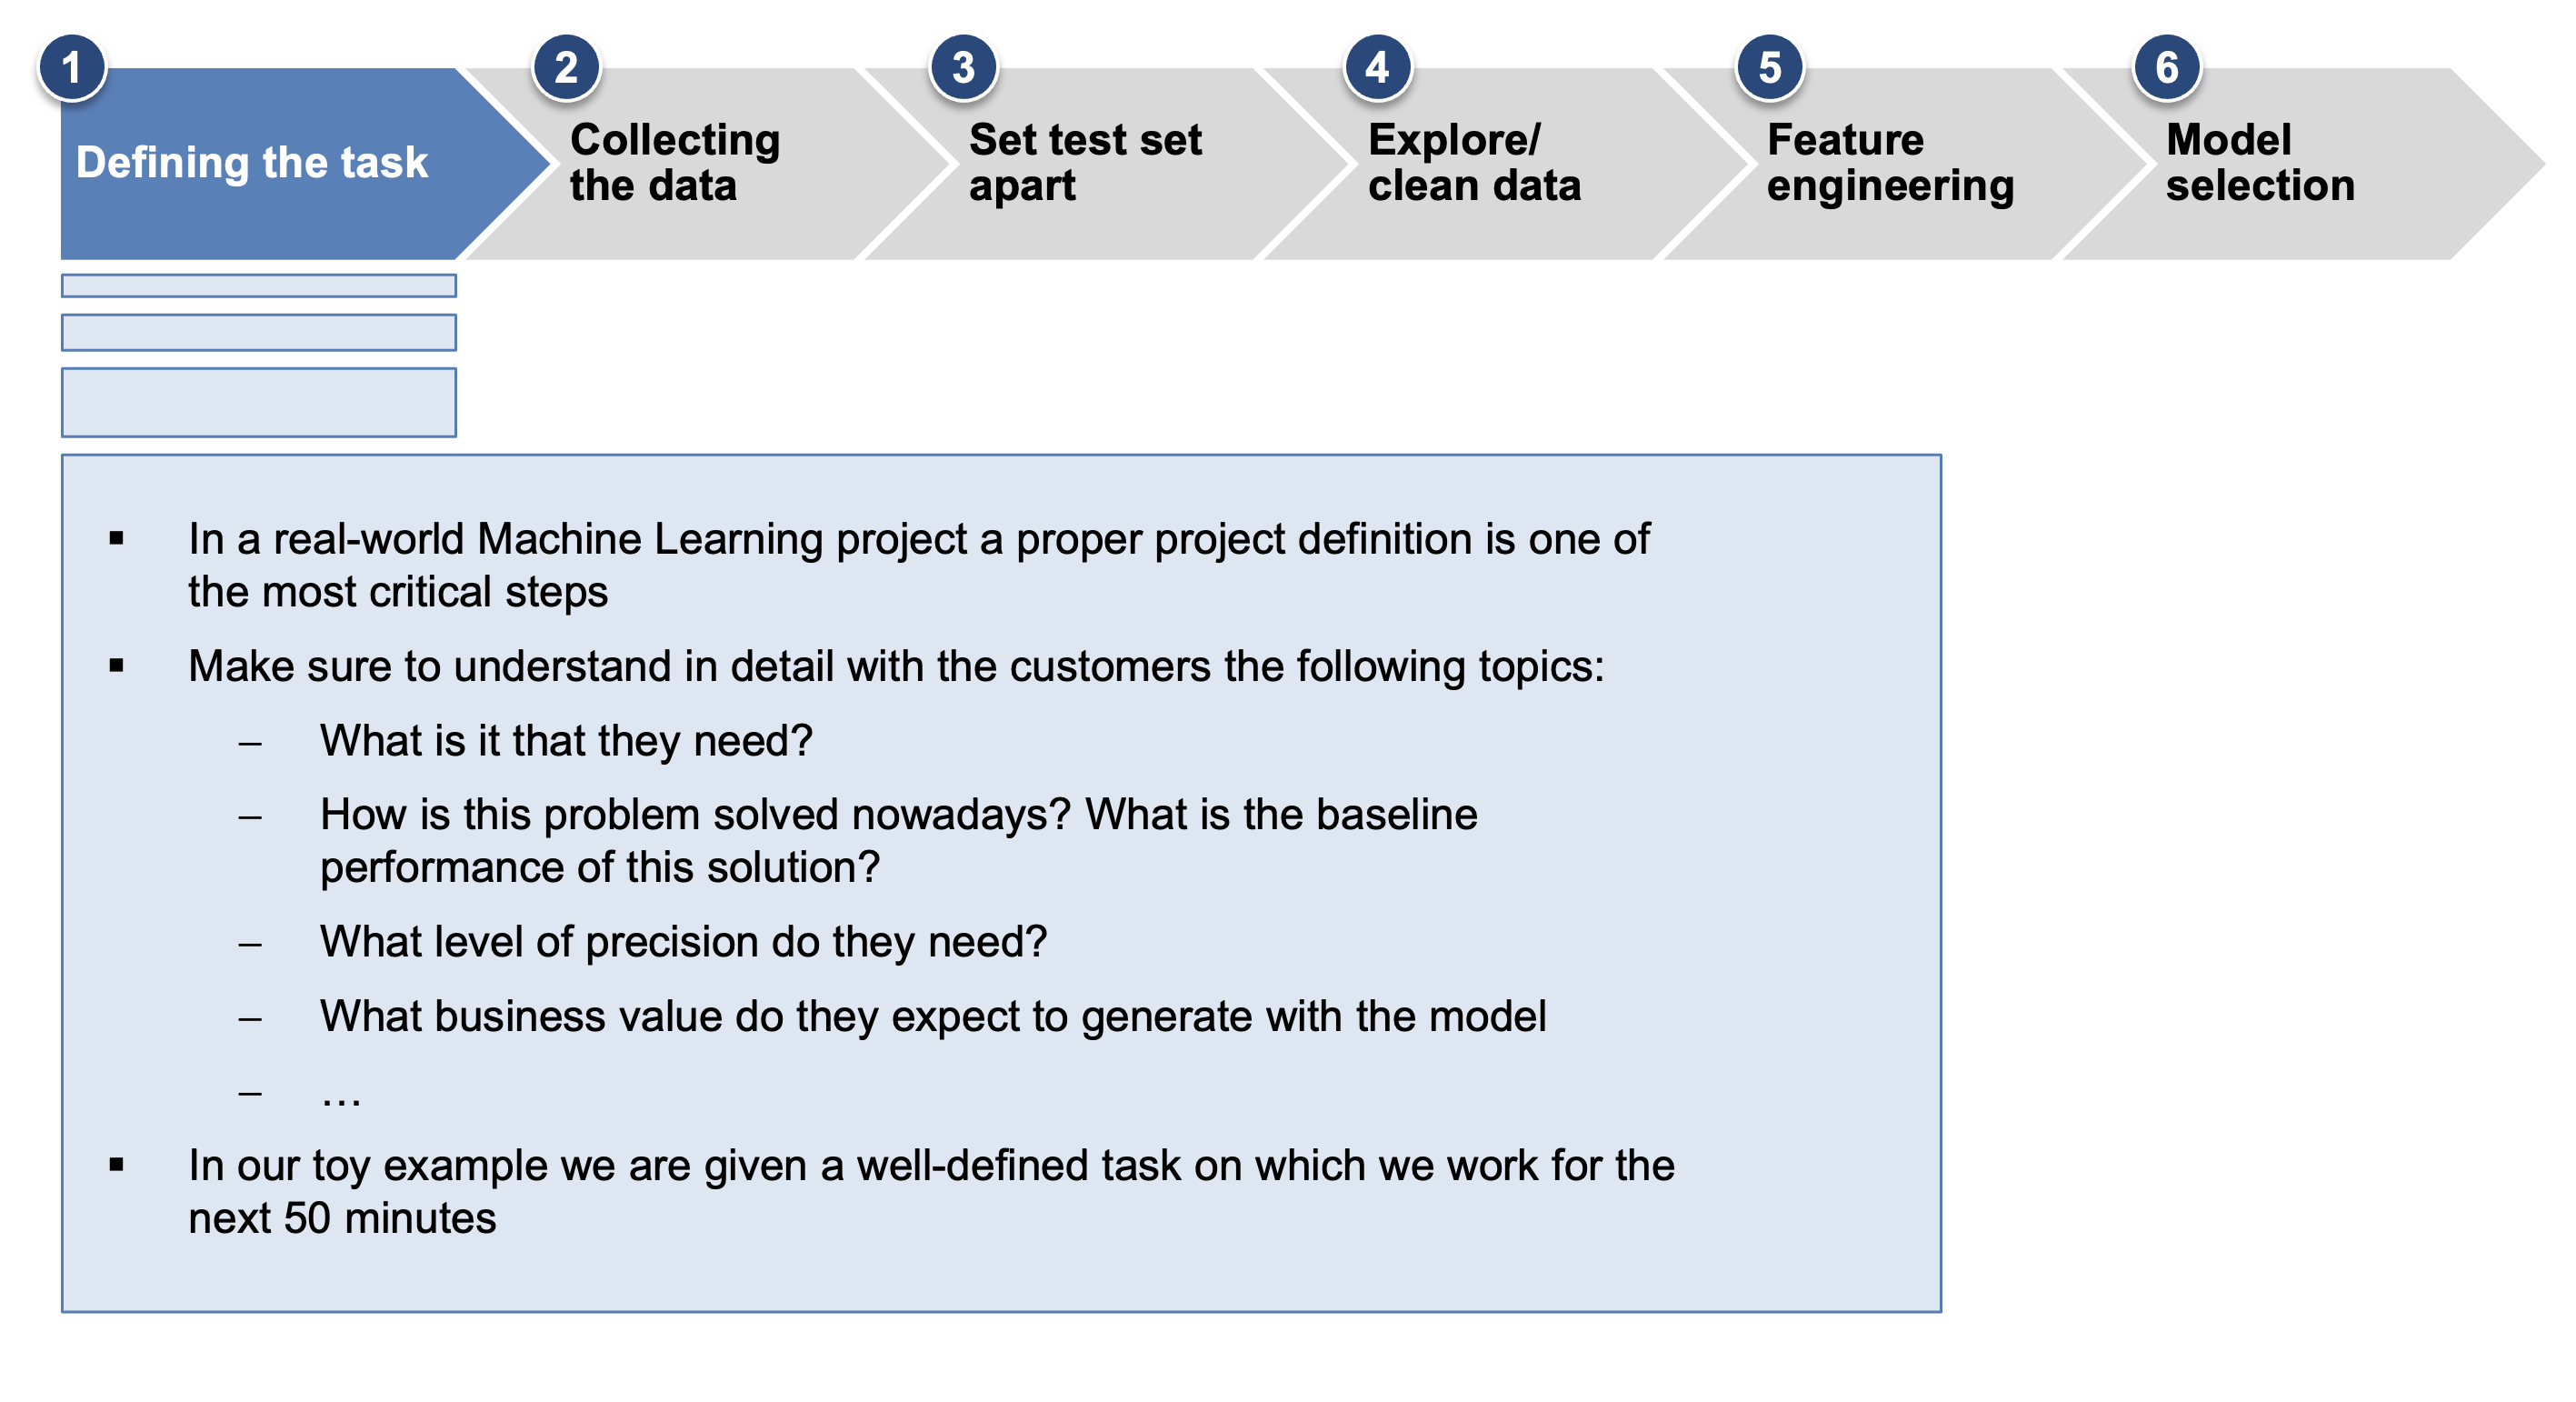

### Summary of our task: 
In this project we are supposed to predict the duration of taxi rides in Manhattan in seconds based on input pick-up time, pick-up and dropoff locations and distance and any other variables available.

## 2) Loading the data and understanding its structure


In this part we obtain the data we need to train our model:

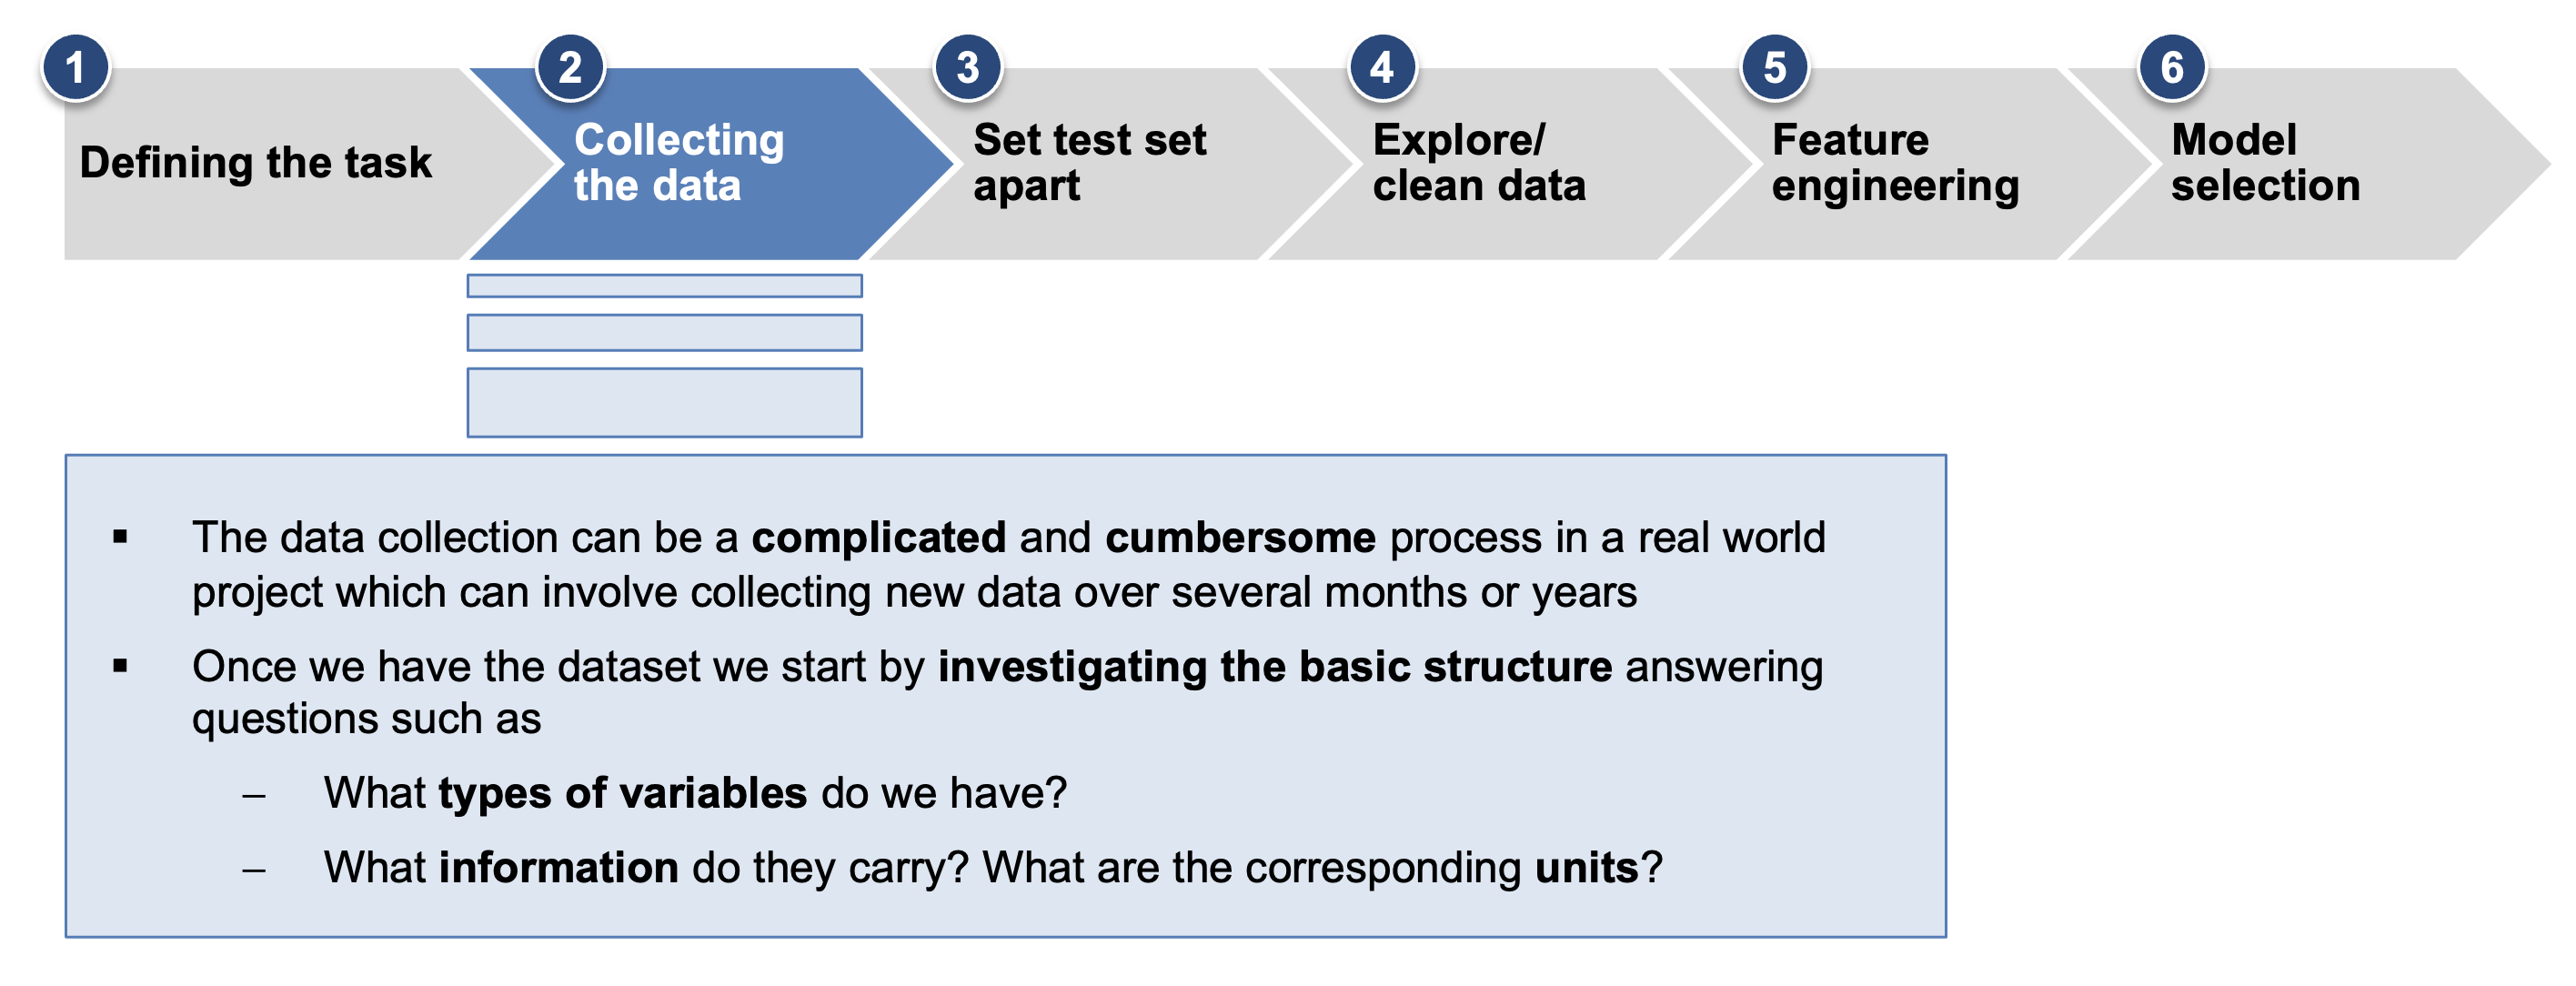

Attributes of all [yellow taxi](https://en.wikipedia.org/wiki/Taxicabs_of_New_York_City) trips in January 2016 are published by the [NYC Taxi and Limosine Commission](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

The full data set takes a long time to download directly, so we've placed a simple random sample of the data into `taxi.db`, a SQLite database.

Columns of the `taxi` table in `taxi.db` include:
- `pickup_datetime`: date and time when the meter was engaged
- `dropoff_datetime`: date and time when the meter was disengaged
- `pickup_lon`: the longitude where the meter was engaged
- `pickup_lat`: the latitude where the meter was engaged
- `dropoff_lon`: the longitude where the meter was disengaged
- `dropoff_lat`: the latitude where the meter was disengaged
- `passengers`: the number of passengers in the vehicle (driver entered value)
- `distance`: trip distance
- `duration`: duration of the trip in seconds

We start by loading our dataset into a dataframe called `all_taxi`. This dataframe only includes trips that have **both** pick-up and drop-off locations within the boundaries of New York City:

- Longitude is between -74.03 and -73.75 (inclusive of both boundaries)
- Latitude is between 40.6 and 40.88 (inclusive of both boundaries)

In [2]:
url = 'https://drive.google.com/uc?id='
file_id = '1hG2Ywu-oxriO7dWCNcAk4F6D-6DUTzdv'
all_taxi = pd.read_csv(url+file_id)
all_taxi

,pickup_datetime,dropoff_datetime,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,passengers,distance,duration
0,2016-01-30 22:47:32,2016-01-30 23:03:53,-73.988251,40.743542,-74.015251,40.709808,1,3.99,981
1,2016-01-04 04:30:48,2016-01-04 04:36:08,-73.995888,40.760010,-73.975388,40.782200,1,2.03,320
2,2016-01-07 21:52:24,2016-01-07 21:57:23,-73.990440,40.730469,-73.985542,40.738510,1,0.70,299
3,2016-01-01 04:13:41,2016-01-01 04:19:24,-73.944725,40.714539,-73.955421,40.719173,1,0.80,343
4,2016-01-08 18:46:10,2016-01-08 18:54:00,-74.004494,40.706989,-74.010155,40.716751,5,0.97,470
...,...,...,...,...,...,...,...,...,...
97687,2016-01-31 02:59:16,2016-01-31 03:09:23,-73.997391,40.721027,-73.978447,40.745277,1,2.17,607
97688,2016-01-14 22:48:10,2016-01-14 22:51:27,-73.988037,40.718761,-73.983337,40.726162,1,0.60,197
97689,2016-01-08 04:46:37,2016-01-08 04:50:12,-73.984390,40.754978,-73.985909,40.751820,4,0.79,215
97690,2016-01-31 12:55:54,2016-01-31 13:01:07,-74.008675,40.725979,-74.009598,40.716003,1,0.85,313


In [ ]:
# In case you have the data stored locally use the following code
# all_taxi = pd.read_csv('all_taxi.csv')
# all_taxi

In [3]:
all_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97692 entries, 0 to 97691
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pickup_datetime   97692 non-null  object 
 1   dropoff_datetime  97692 non-null  object 
 2   pickup_lon        97692 non-null  float64
 3   pickup_lat        97692 non-null  float64
 4   dropoff_lon       97692 non-null  float64
 5   dropoff_lat       97692 non-null  float64
 6   passengers        97692 non-null  int64  
 7   distance          97692 non-null  float64
 8   duration          97692 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 6.7+ MB


A scatter plot of pickup locations shows that most of them are on the island of Manhattan. The empty white rectangle is Central Park; cars are not allowed there.

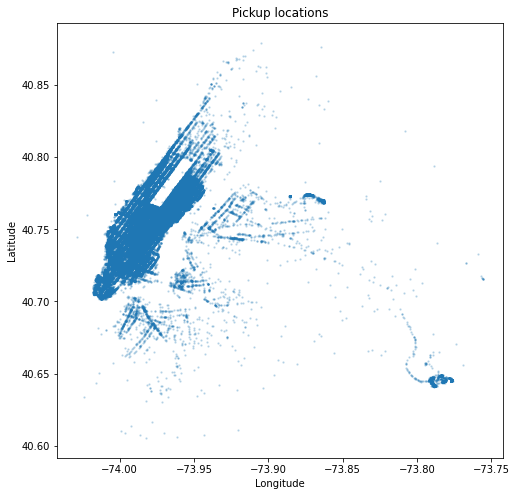

In [4]:
def pickup_scatter(t):
    plt.scatter(t['pickup_lon'], t['pickup_lat'], s=2, alpha=0.2)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Pickup locations')
    
plt.figure(figsize=(8, 8))
pickup_scatter(all_taxi)

The two small blobs outside of Manhattan with very high concentrations of taxi pick-ups are airports.



---


Next, we restrict our dataset to trips starting and ending in Manhattan. This is because our task is limited to such trips.


In [5]:
file_id = '1l8M5eraCQKY1a2QbdAmb0UHB2PLrlBfo'
polygon = pd.read_csv(url + file_id)

file_id = '1-voRGHdQ6LO0yW5QajlnIc_BT0Biay7u'
manhattan_taxi = pd.read_csv(url + file_id)
computation_mt_needed = False

# In case your data is available locally
# polygon = pd.read_csv('manhattan.csv')


def in_manhattan(x, y):
    """Whether a longitude-latitude (x, y) pair is in the Manhattan polygon."""
    j = polygon.shape[0]-1
    odd = False
    for i in range(polygon.shape[0]):
        xsi, xsj, ysi, ysj = xs[i], xs[j], ys[i], ys[j]
        if (ysi < y <= ysj) or (ysj < y <= ysi):
            z = (y - ysi) / (ysj - ysi) * (xsj - xsi)
            if xsi + z < x: 
                odd = not odd
        j = i
    return odd

xs, ys = polygon['lon'], polygon['lat']

def trip_in_manhattan(row):
    pickup = in_manhattan(row['pickup_lon'], row['pickup_lat'])
    dropoff = in_manhattan(row['dropoff_lon'], row['dropoff_lat'])
    return pickup and dropoff

if os.path.exists('manhattan_taxi.csv'):
    manhattan_taxi = pd.read_csv('manhattan_taxi.csv')
    
if 'manhattan_taxi' not in dir() and computation_mt_needed:
    manhattan_taxi = all_taxi[all_taxi.apply(trip_in_manhattan, axis=1)]
    manhattan_taxi.to_csv('manhattan_taxi.csv', index=False)

In [6]:
manhattan_taxi

,pickup_datetime,dropoff_datetime,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,passengers,distance,duration
0,2016-01-30 22:47:32,2016-01-30 23:03:53,-73.988251,40.743542,-74.015251,40.709808,1,3.99,981
1,2016-01-04 04:30:48,2016-01-04 04:36:08,-73.995888,40.760010,-73.975388,40.782200,1,2.03,320
2,2016-01-07 21:52:24,2016-01-07 21:57:23,-73.990440,40.730469,-73.985542,40.738510,1,0.70,299
3,2016-01-08 18:46:10,2016-01-08 18:54:00,-74.004494,40.706989,-74.010155,40.716751,5,0.97,470
4,2016-01-02 12:39:57,2016-01-02 12:53:29,-73.958214,40.760525,-73.983360,40.760406,1,1.70,812
...,...,...,...,...,...,...,...,...,...
83397,2016-01-31 02:59:16,2016-01-31 03:09:23,-73.997391,40.721027,-73.978447,40.745277,1,2.17,607
83398,2016-01-14 22:48:10,2016-01-14 22:51:27,-73.988037,40.718761,-73.983337,40.726162,1,0.60,197
83399,2016-01-08 04:46:37,2016-01-08 04:50:12,-73.984390,40.754978,-73.985909,40.751820,4,0.79,215
83400,2016-01-31 12:55:54,2016-01-31 13:01:07,-74.008675,40.725979,-74.009598,40.716003,1,0.85,313


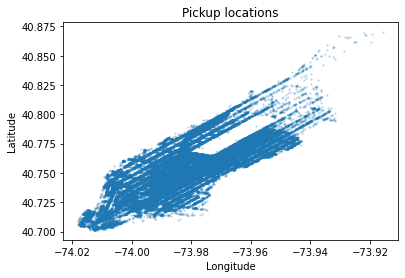

In [7]:
pickup_scatter(manhattan_taxi)

### Summary of data collection

- Loaded the data from a CSV file on Google Drive
- Received dataset with 8 features (thereof 6 numerical and 2 timestamps) + 1 output value (duration)
- Removed trips which do not start or end in Manhattan, saved these in DataFrame `manhattan_taxi``

## 3) Splitting the data into training and test set



Before doing anything else, we are going to split our data into training and test sets:

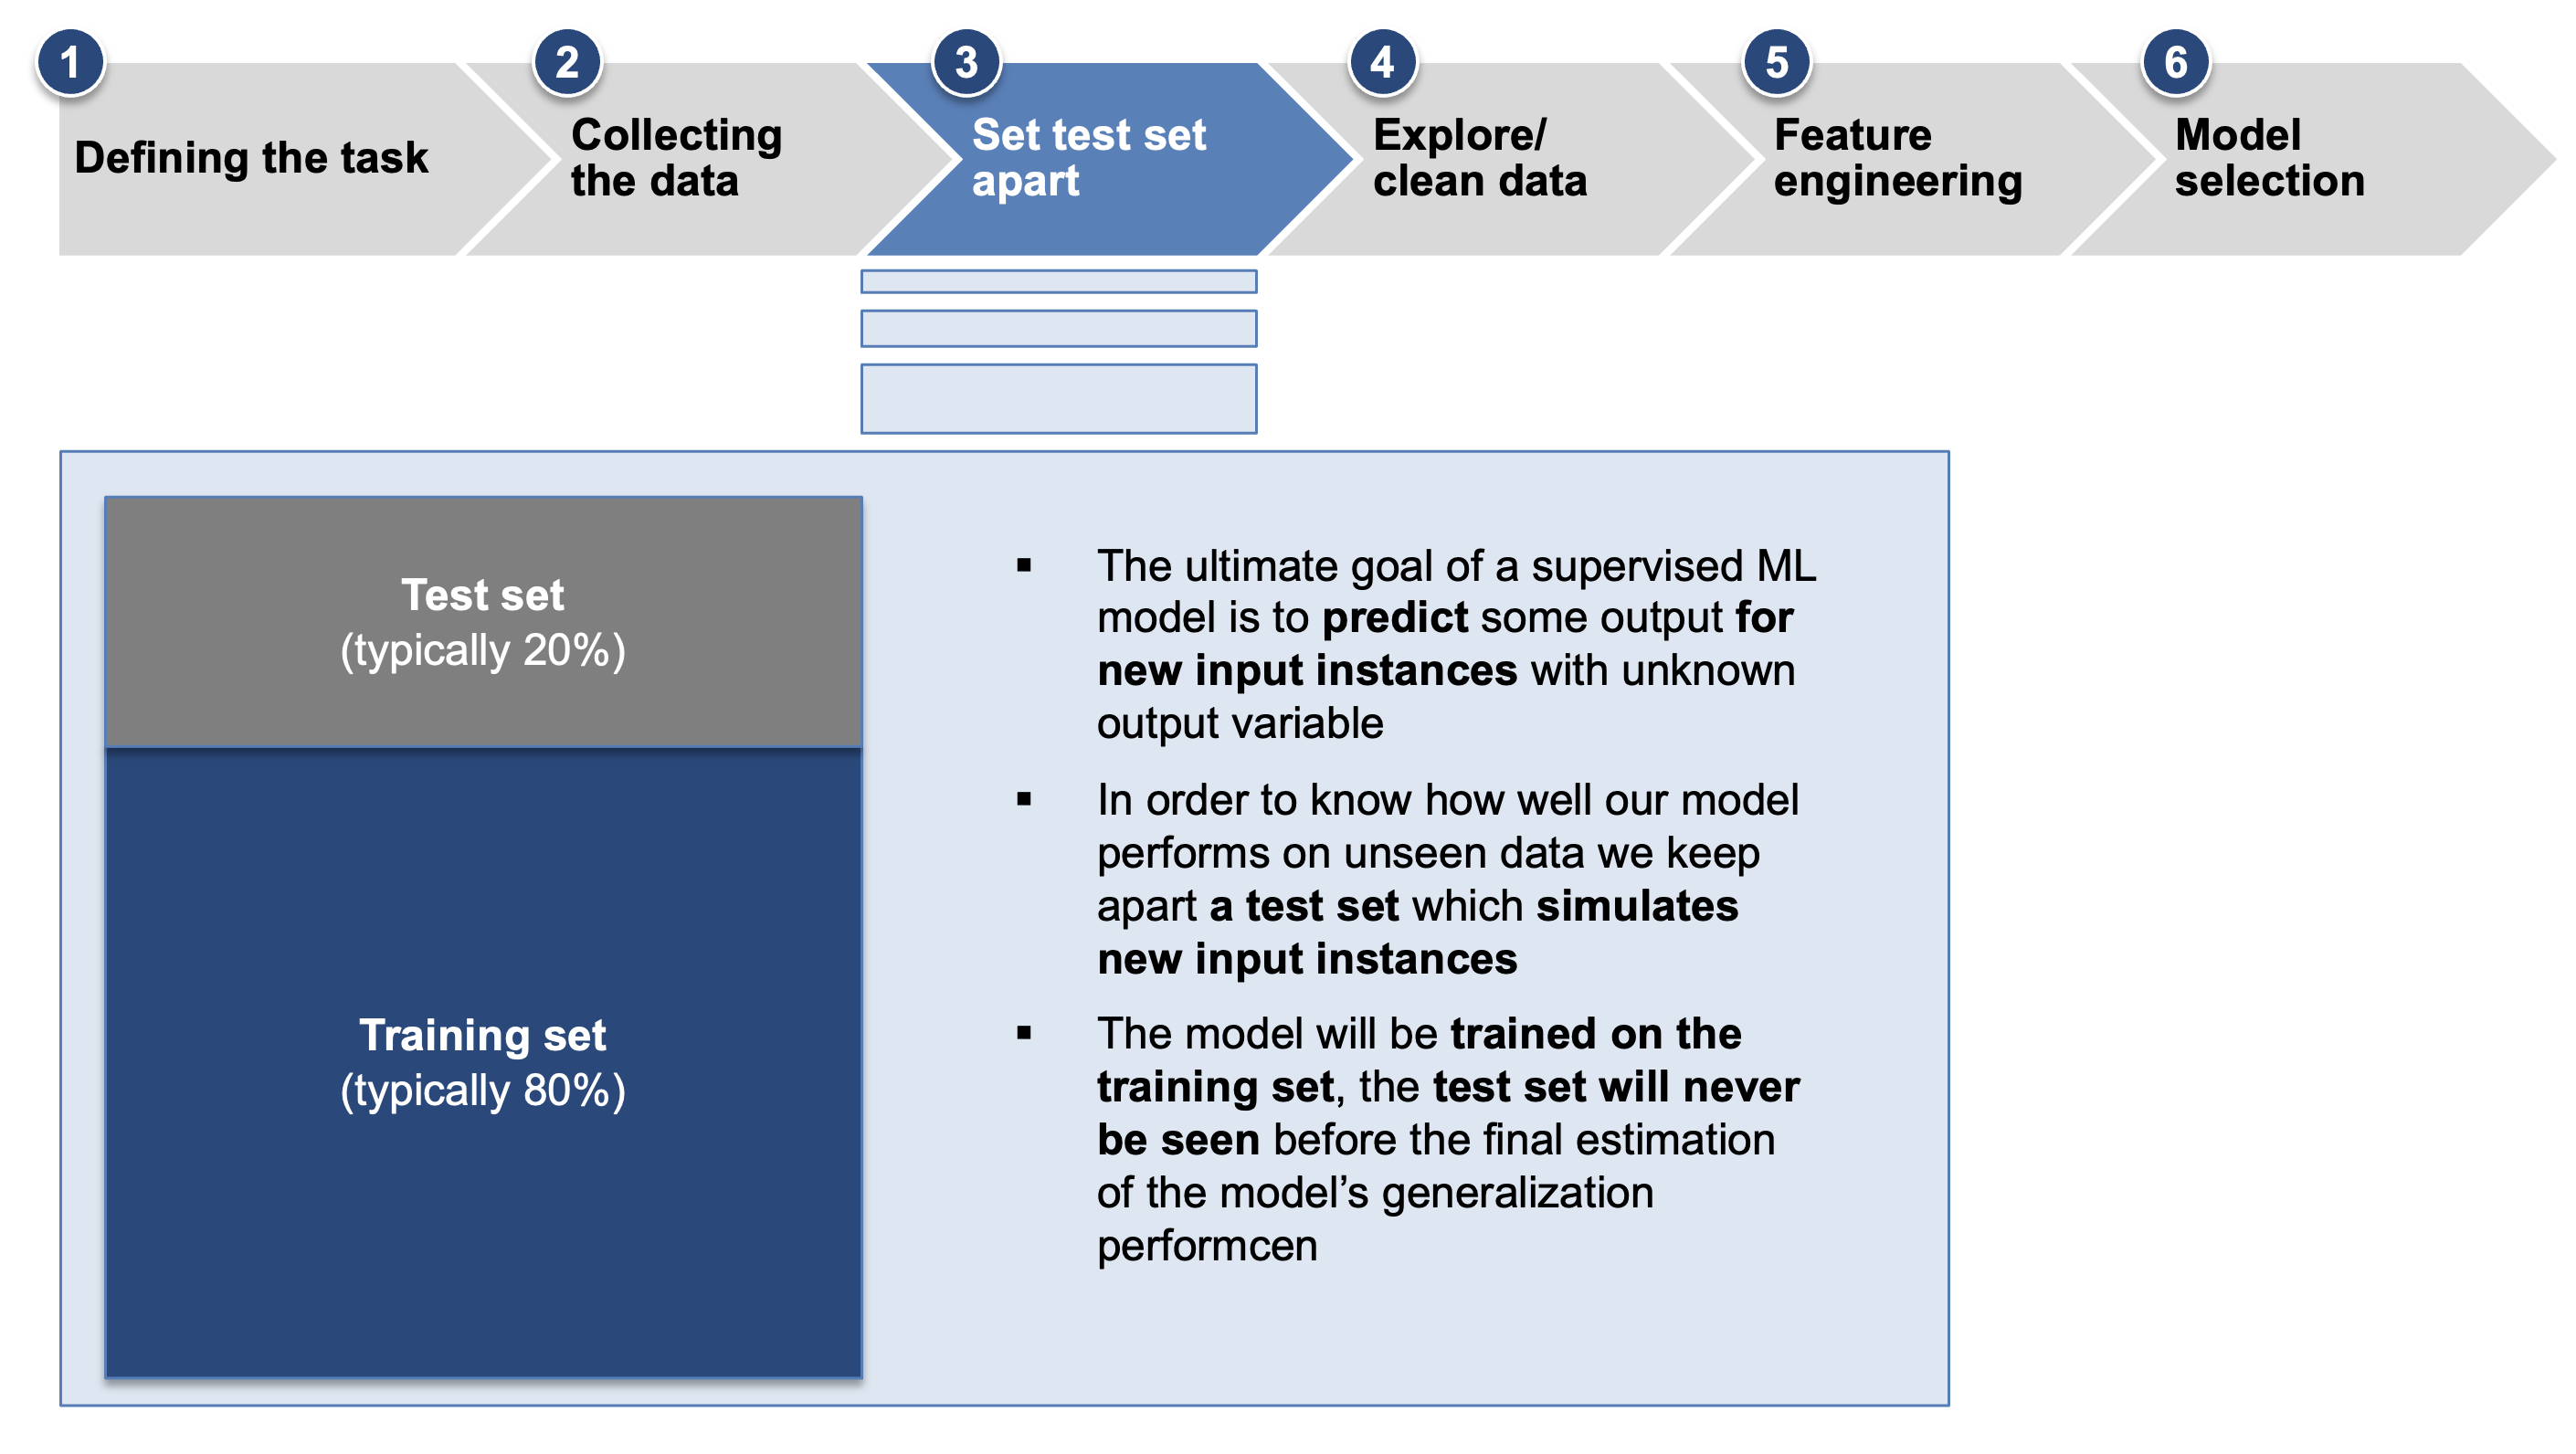

In [8]:
train, test = sklearn.model_selection.train_test_split(
    manhattan_taxi, train_size=0.8, test_size=0.2, random_state=2)
print('Train:', train.shape, 'Test:', test.shape)

Train: (66721, 9) Test: (16681, 9)


## 4) Exploring and cleaning the data

In this section we explore and clean the data:

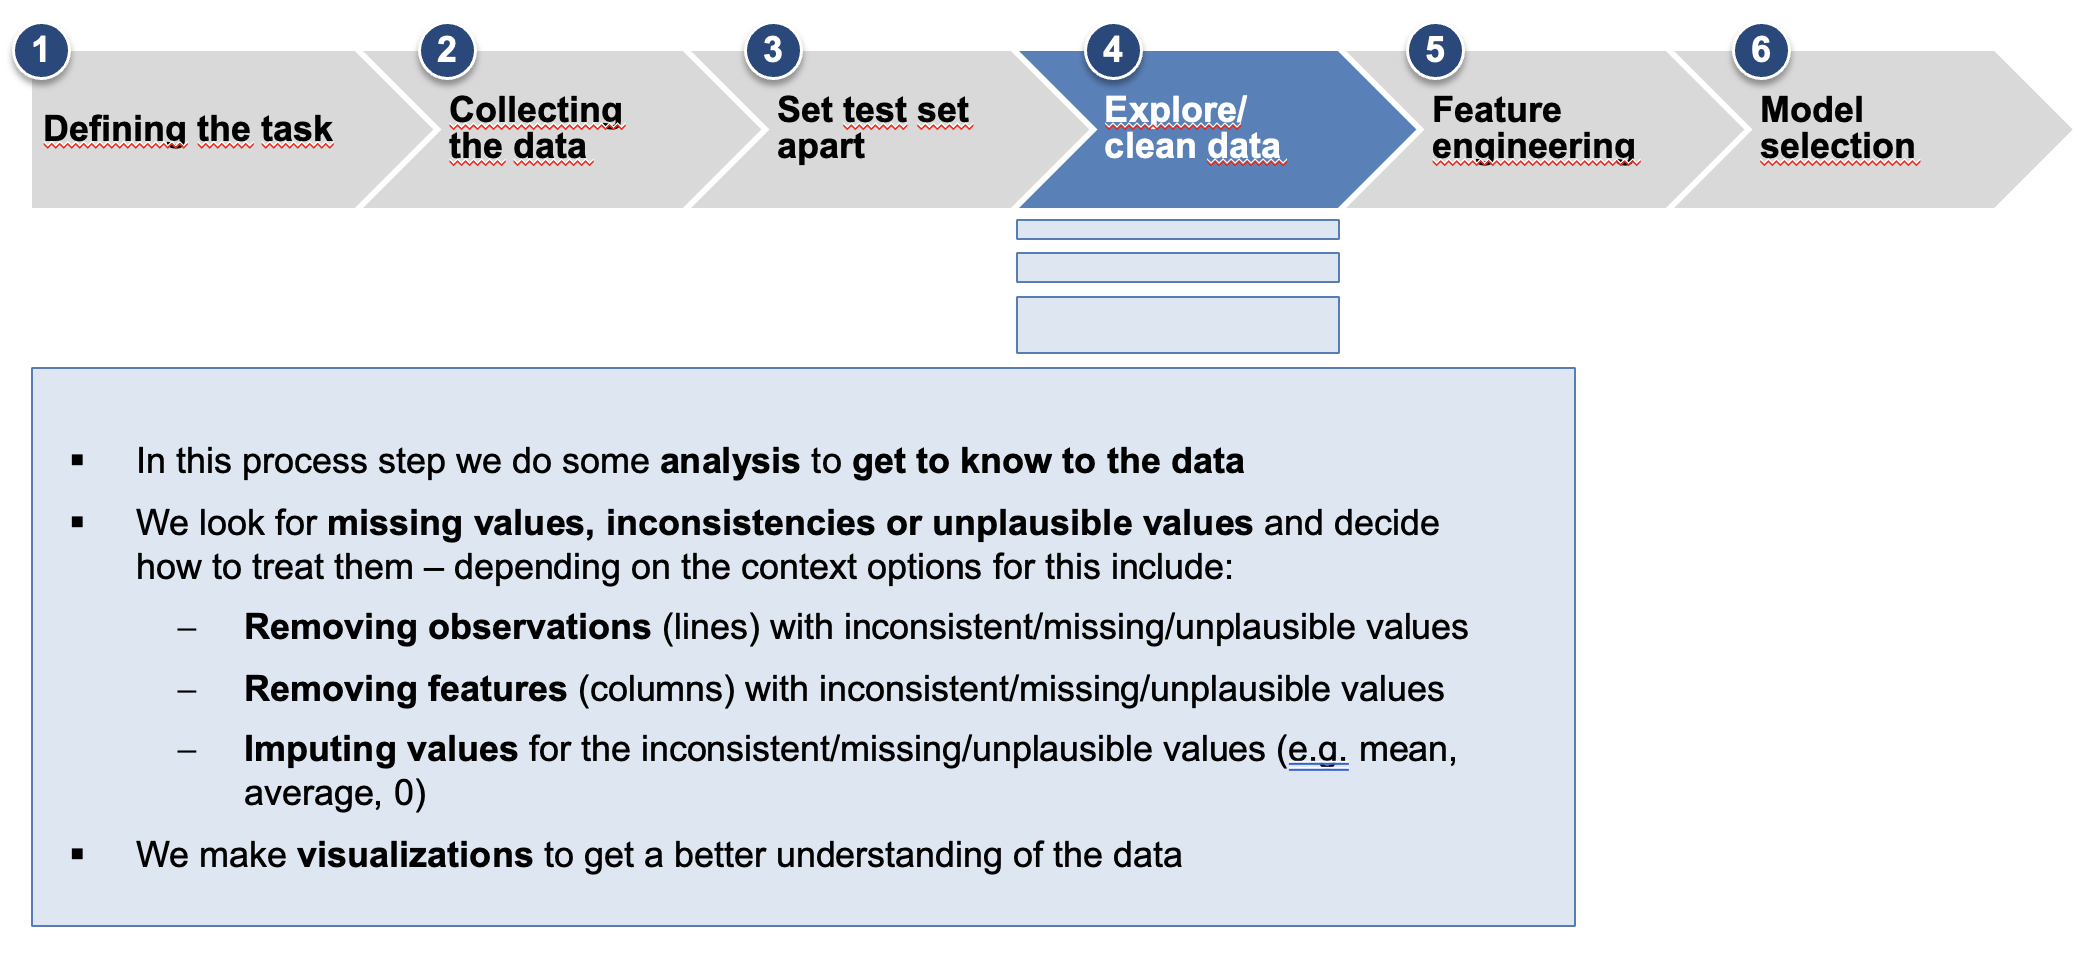

### 4.1: Using summary statistics to detect artefacts and outliers

In [9]:
train.describe()

,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,passengers,distance,duration
count,66721.000000,66721.000000,66721.000000,66721.000000,66721.000000,66721.000000,66721.000000
mean,-73.981222,40.754734,-73.980097,40.756345,1.669384,1.873722,764.856462
std,0.016154,0.021436,0.017327,0.024056,1.325241,1.441903,3019.325498
min,-74.017944,40.701378,-74.017990,40.701473,0.000000,0.000000,0.000000
25%,-73.992081,40.740150,-73.991859,40.740437,1.000000,0.900000,356.000000
50%,-73.982315,40.755547,-73.981438,40.756271,1.000000,1.490000,564.000000
75%,-73.970612,40.768616,-73.968910,40.771111,2.000000,2.350000,862.000000
max,-73.915741,40.870026,-73.914429,40.872025,6.000000,25.690000,86371.000000


#### Discussion question:
What do you observe? Do you perceive any artefacts such as strange values, outliers etc? If so, how should we deal with these for our prediction model?

*Put your answer here*

We create a DataFrame called `clean_train` that only includes trips with a positive passenger count, a positive distance, a duration of at least 1 minute and at most 1 hour.

In [10]:
def remove_unplausible_trips(df):
    df_clean = df.query('passengers > 0 and \
                           duration >= 60 and \
                           duration <= 60*60 and \
                           distance > 0 and \
                           distance / (duration / (60*60)) < 100').copy() # also remove trips with speed > 100mph
    return df_clean

train_clean = remove_unplausible_trips(train)
train_clean

,pickup_datetime,dropoff_datetime,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,passengers,distance,duration
60291,2016-01-09 21:46:42,2016-01-09 21:53:07,-73.991196,40.749409,-73.992287,40.742634,1,0.66,385
36822,2016-01-17 10:30:31,2016-01-17 10:40:04,-73.977997,40.730762,-73.983185,40.715023,1,1.90,573
55858,2016-01-13 23:40:43,2016-01-13 23:52:11,-73.996986,40.731365,-73.982689,40.742348,5,1.73,688
79552,2016-01-24 13:09:11,2016-01-24 13:21:25,-73.982040,40.778786,-73.987083,40.766048,1,1.39,734
8130,2016-01-15 17:15:02,2016-01-15 17:25:45,-73.972633,40.780842,-73.985268,40.758110,2,1.92,643
...,...,...,...,...,...,...,...,...,...
80232,2016-01-20 13:20:07,2016-01-20 13:28:02,-73.985573,40.778210,-73.971909,40.782089,1,0.98,475
33867,2016-01-21 11:34:46,2016-01-21 11:48:22,-73.981438,40.780956,-73.997375,40.761303,1,2.00,816
31019,2016-01-06 11:24:07,2016-01-06 11:39:06,-73.989594,40.735512,-74.012878,40.701607,2,4.72,899
44566,2016-01-31 17:29:57,2016-01-31 17:37:46,-73.996773,40.725529,-74.010071,40.733200,1,1.04,469


### 4.2: Visualizing the data to detect other untypical values

The data we have covers the trips in the month January 2016. Not all days in January are the same, the month starts with a holiday, there is Martin Luther King day. To investigate this further, we build a histogram of the trips per day. 

In [11]:
# Import datetime package to process the timestamps provided in columns pickup_datetime and dropoff_datetime
from datetime import datetime

def get_day(d):
    return d.day

# Create Series 'dates' and day' which contains the date resp. the day of the ride 
# (a number between 1 and 31 depending on the calendar day)
dates = (pd.to_datetime(train_clean['pickup_datetime'])).dt.date
days = dates.apply(get_day)

In [12]:
# The values of the new column actually vary between 1 and 31
days.describe()

count    66247.000000
mean        16.062448
std          8.859971
min          1.000000
25%          9.000000
50%         16.000000
75%         24.000000
max         31.000000
Name: pickup_datetime, dtype: float64

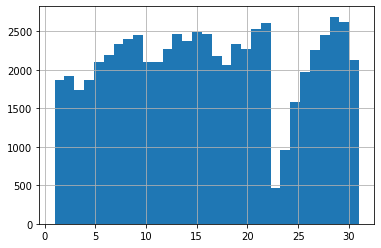

In [13]:
# Plot a histogram of the variable day (i.e. values on y-axis = amount of trips on that day)
days.hist(bins=31)

#### Discussion question: 
What do you observe? How should we deal with this behavior?

*Put your answer here*

In [14]:
# We generate a DataFrame which counts the number of trips per day to see on 
# which precise dates the atypical values are observed
trips_per_day = days.value_counts().sort_index()
trips_per_day

1     1865
2     1919
3     1743
4     1862
5     2105
6     2187
7     2340
8     2405
9     2449
10    2100
11    2106
12    2270
13    2459
14    2379
15    2492
16    2463
17    2183
18    2066
19    2339
20    2265
21    2525
22    2608
23     470
24     954
25    1582
26    1967
27    2250
28    2456
29    2688
30    2625
31    2125
Name: pickup_datetime, dtype: int64

We have generated a list of dates that should have a fairly typical distribution of taxi rides, which excludes holidays and blizzards. The function reduces the dataset to the subset of rides that is on these days.

In [15]:
import calendar
import re
from datetime import date

print('Typical dates:...\n')
pat = '  [1-3]|18 | 23| 24|25 |26 '
print(re.sub(pat, '   ', calendar.month(2016, 1)))


def remove_atypical_dates(df):
    atypical = [1, 2, 3, 18, 23, 24, 25, 26]
    typical_days = [n for n in range(1, 32) if n not in atypical]
    typical_days

    dates = (pd.to_datetime(df['pickup_datetime'])).dt.date
    days = dates.apply(get_day) 
    df_clean = df[days.isin(typical_days)]
    
    return df_clean

train_clean_final = remove_atypical_dates(train_clean)

Typical dates:...

    January 2016
Mo Tu We Th Fr Sa Su
                    
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
   19 20 21 22      
      27 28 29 30 31



### 4.3: Summary of data cleaning
We have performed two steps to make the data cleaner:
* Restricted to trips with a positive passenger count, a positive distance, a duration of at least 1 minute and at most 1 hour, and an average speed of at most 100 miles per hour.
* Excluded trips on atypical dates.
Obviously, in real life it is likely that you will have to perform more than only these two steps.

We summarize our data cleaning procedure in a function `clean()` and apply it to our original training and test data.

In [16]:
def clean(df):
    df = remove_unplausible_trips(df).copy()
    df = remove_atypical_dates(df)
    return df

train = clean(train)
test = clean(test)

## 5) Feature Engineering

In this part, we will select / engineer the features for our regression model.

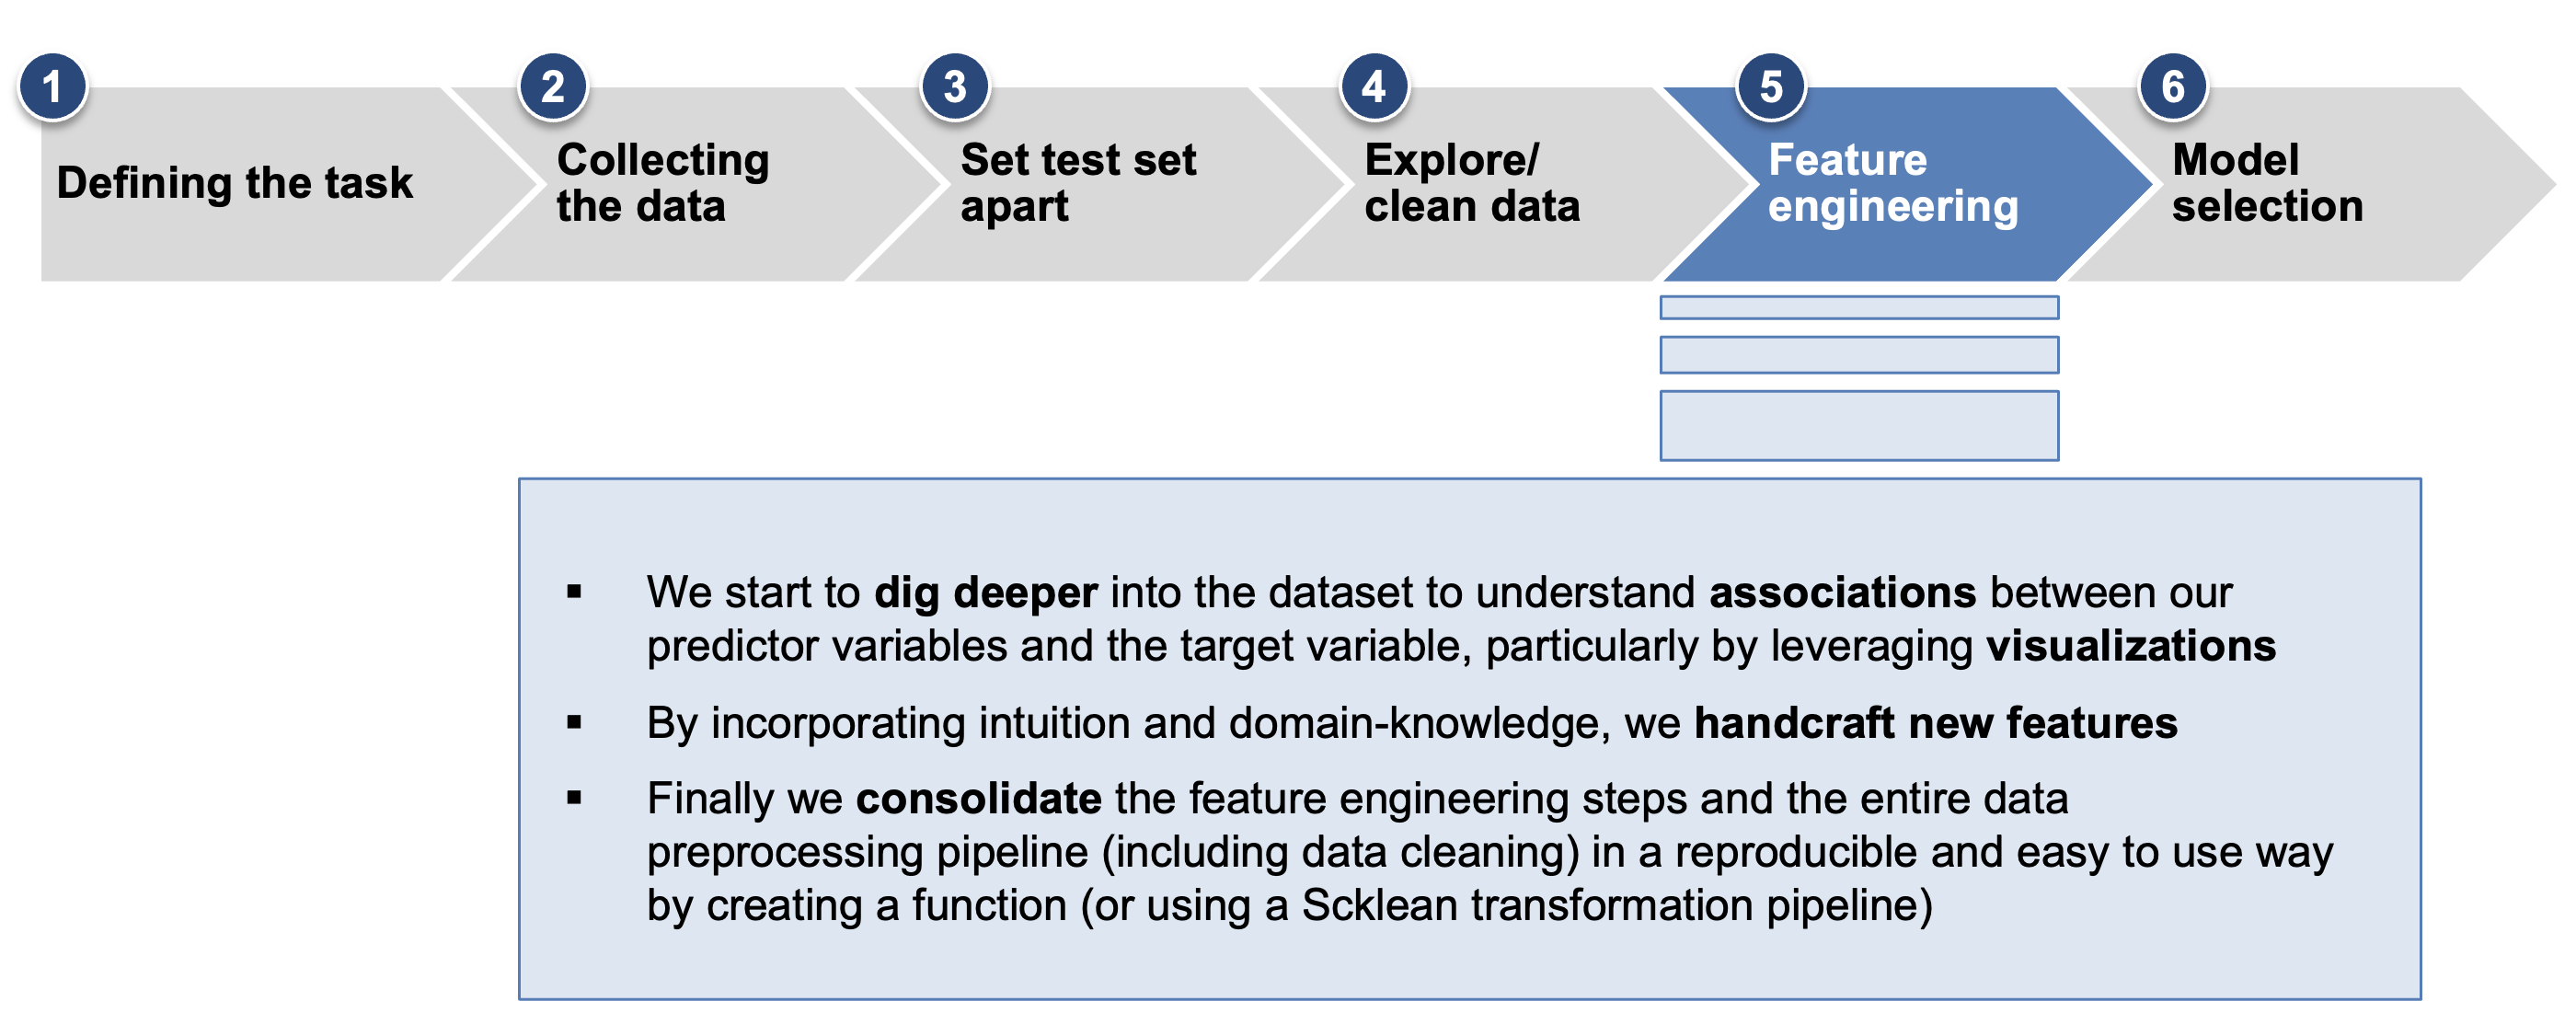

Below, the provided `augment` function adds various columns to a taxi ride dataframe. 

- `hour`: The integer hour of the pickup time. E.g., a 3:45pm taxi ride would have `15` as the hour. A 12:20am ride would have `0`.
- `day`: The day of the week with Monday=0, Sunday=6.
- `weekend`: 1 if and only if the `day` is Saturday or Sunday. 0 otherwise.
- `period`: 1 for early morning (12am-6am), 2 for daytime (6am-6pm), and 3 for night (6pm-12pm).
- `speed`: Average speed in miles per hour. (BE CAREFUL: We can use this feature for investigating correlations, but we cannot use it in our final model because we need the target variable `duration` to compute it!)

No changes are required; just run this cell.

In [17]:
def speed(t):
    """Return a column of speeds in miles per hour."""
    return t['distance'] / t['duration'] * 60 * 60

def augment(t):
    """Augment a dataframe t with additional columns."""
    u = t.copy()
    pickup_time = pd.to_datetime(t['pickup_datetime'])
    u.loc[:, 'hour'] = pickup_time.dt.hour
    u.loc[:, 'day'] = pickup_time.dt.weekday
    u.loc[:, 'weekend'] = (pickup_time.dt.weekday >= 5).astype(int)
    u.loc[:, 'period'] = np.digitize(pickup_time.dt.hour, [0, 6, 18])
    u.loc[:, 'speed'] = speed(t)
    return u
    
train_augmented = augment(train)
train_augmented.iloc[0,:] # An example row

pickup_datetime     2016-01-09 21:46:42
dropoff_datetime    2016-01-09 21:53:07
pickup_lon                   -73.991196
pickup_lat                    40.749409
dropoff_lon                  -73.992287
dropoff_lat                   40.742634
passengers                            1
distance                           0.66
duration                            385
hour                                 21
day                                   5
weekend                               1
period                                3
speed                          6.171429
Name: 60291, dtype: object

### 5.1: Investigate the influence of the weekday on trip duration

We create a box plot that compares the distributions of taxi trip durations for each day. Individual days shoud appear on the horizontal axis, and duration values should appear on the vertical axis.

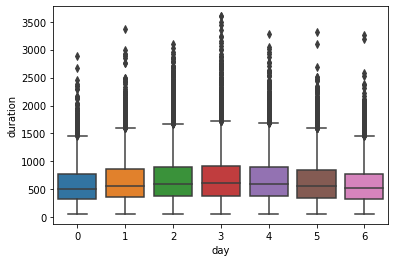

In [18]:
sns.boxplot(
    data = train_augmented,
    x = 'day',
    y = 'duration')

**Discussion question**: In one or two sentences, describe the assocation between the day of the week and the duration of a taxi trip. What is the conclusion for the regression model?

*Put your answer here*

We could also check if this effect can also be observed in average speed. If so, it is likely that it is driven by higher levels of traffic during the week and not by trips of longer distance.

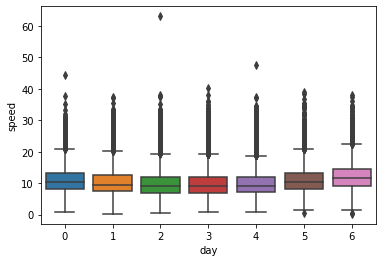

In [19]:
sns.boxplot(
    data = train_augmented,
    x = 'day',
    y = 'speed')

### 5.2 Investigate the influence of the daytime on the duration

Use `sns.histplot` to create an overlaid histogram comparing the distribution of average speeds for taxi rides that start in the early morning (12am-6am), day (6am-6pm; 12 hours), and night (6pm-12am; 6 hours). Your plot should look like this:

In [20]:
def get_period(hour):
    if hour < 6:
        return 0
    elif hour < 18:
        return 1
    else:
        return 2
    
period = train_augmented['hour'].apply(get_period)

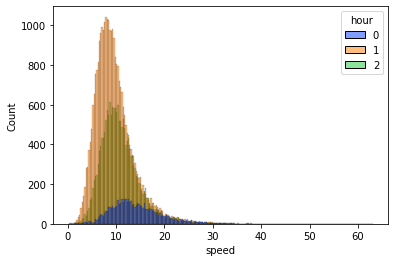

In [21]:
sns.histplot(
    data = train_augmented,
    x = 'speed',
    hue = period,
    palette="bright"
)

**Discussion question**: In one or two sentences, describe the assocation between the daytime of the week and the duration of a taxi trip.

*Put your answer here*

### 5.3: Investigate the influence of the geographic region on the duration

Manhattan can roughly be divided into Lower, Midtown, and Upper regions. Instead of studying a map, let's approximate by finding the first principal component of the pick-up location (latitude and longitude). Before doing that, let's once again take a look at a scatterplot of trips in Manhattan:

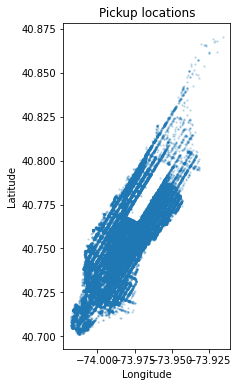

In [22]:
plt.figure(figsize=(3, 6))
pickup_scatter(manhattan_taxi)

We add a `region` column to `train_augmented` that categorizes each pick-up location as 0, 1, or 2 based on the value of each point's first principal component, such that an equal number of points fall into each region. 

For additional information you can read here about [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis).

In [23]:
# Find the first principal component
D = train_augmented[['pickup_lon', 'pickup_lat']]
pca_means = D.mean(axis=0)
X = D - pca_means
u, s, vt = np.linalg.svd(X, full_matrices=False)


def add_region(df):
    """Return a dataframe with a region column added."""
    df_reg = df.copy()
    D = df[['pickup_lon', 'pickup_lat']]
    assert D.shape[0] == df.shape[0], 'You set D using the incorrect table'
    # Always use the same data transformation used to compute vt
    X = D - pca_means 
    first_pc = X @ vt[0,:]
    df_reg.loc[:,'region'] = pd.qcut(first_pc, 3, labels=[0, 1, 2])
    return df_reg
    
train_augmented = add_region(train_augmented)

Let's see how PCA divided the trips into three groups. These regions do roughly correspond to Lower Manhattan (below 14th street), Midtown Manhattan (between 14th and the park), and Upper Manhattan (bordering Central Park). No prior knowledge of New York geography was required!

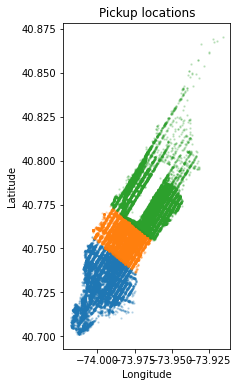

In [24]:
plt.figure(figsize=(3, 6))
for i in [0,1,2]:
    pickup_scatter(train_augmented[train_augmented['region'] == i])

We create another overlaid histogram to investigate the association between duration and region.

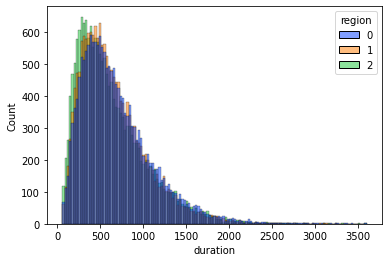

In [25]:
sns.histplot(
    data = train_augmented,
    x = 'duration',
    hue = 'region',
    palette="bright"
)

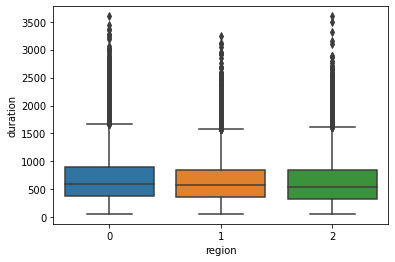

In [26]:
sns.boxplot(
    data = train_augmented,
    x = 'region',
    y = 'duration')

**Discussion question**: In one or two sentences, describe the assocation between the region of pickup and the duration of a taxi trip.

*Put your answer here.*

### 5.4: Investigate association between region and average speed during night
Next, we use `sns.histplot` to create an overlaid histogram comparing the distribution of speeds for nighttime taxi rides (6pm-12am) in the three different regions defined above. Does it appear that there is an association between region and average speed during the night?

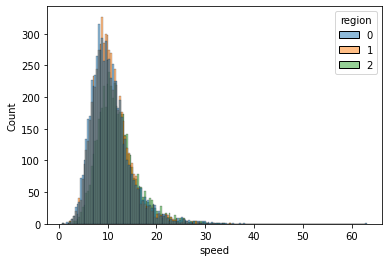

In [27]:
sns.histplot(
    data = train_augmented[period == 2],
    x = 'speed',
    hue = 'region'
)

**Discussion question**: In one or two sentences, describe the assocation between the region of Manhattan and the average speed of a taxi trip at night.

*Put your answer here.*

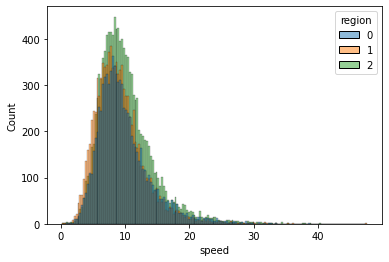

In [28]:
sns.histplot(
    data = train_augmented[period == 1],
    x = 'speed',
    hue = 'region'
)

### 5.5: Summary of feature engineering
Finally, we create a DataFrame that includes all of these features. Quantitative features are converted to standard units, while categorical features are converted to dummy variables using one-hot encoding. Only the `speed` is not included because it was computed from the `duration`; it's impossible to know the speed without knowing the duration, given that you know the distance. Thus, the steps of our Feature Engineering are:
- Include features `hour`, `day`, `weekend`, `period` and `region`
- Separate between numerical variables (can take continuous values) and categorical variables (can take a finite number of values)
- Scale numerical features between 0 and 1
- Perform one-hot-encoding for the categorical variables

In [29]:
from sklearn.preprocessing import StandardScaler

def create_features(df):
    df_out = df.copy()
    pickup_time = pd.to_datetime(df_out['pickup_datetime'])
    df_out.loc[:, 'hour'] = pickup_time.dt.hour
    df_out.loc[:, 'day'] = pickup_time.dt.weekday
    df_out.loc[:, 'weekend'] = (pickup_time.dt.weekday >= 5).astype(int)
    df_out.loc[:, 'period'] = np.digitize(pickup_time.dt.hour, [0, 6, 18])
    df_out = add_region(df_out)
    return df_out

num_vars = ['pickup_lon', 'pickup_lat', 'dropoff_lon', 'dropoff_lat', 'distance']
cat_vars = ['hour', 'day', 'weekend', 'period', 'region']


def scale(df):
    scaler = StandardScaler()
    scaled = df[num_vars].copy()
    scaled.iloc[:,:] = scaler.fit_transform(df[num_vars]) # Convert to standard units
    categoricals = [pd.get_dummies(df[s], prefix=s, drop_first=True) for s in cat_vars]
    return pd.concat([scaled] + categoricals, axis=1)

Finally, we consolidate the entire preprocessing chain in the function `preprocess(df)`.

In [30]:
def preprocess(df):
    df_out = df.copy()
    df_cleaned = clean(df_out)
    labels = df_cleaned.duration
    df_cleaned.drop('duration', axis = 1)
    df_features = create_features(df_cleaned)
    df_processed = scale(df_features)
    return df_processed, labels

Now we apply the entire data preprocessing pipeline to a fresh copy of training and test data:

In [31]:
train, test = sklearn.model_selection.train_test_split(
    manhattan_taxi, train_size=0.8, test_size=0.2, random_state=2)

# Prepare training data
train_processed, train_labels = preprocess(train) # preprocess training data

# Prepare test data
test_processed, test_labels = preprocess(test) # preprocess test data

In [32]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53681 entries, 60291 to 44566
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pickup_lon   53681 non-null  float64
 1   pickup_lat   53681 non-null  float64
 2   dropoff_lon  53681 non-null  float64
 3   dropoff_lat  53681 non-null  float64
 4   distance     53681 non-null  float64
 5   hour_1       53681 non-null  uint8  
 6   hour_2       53681 non-null  uint8  
 7   hour_3       53681 non-null  uint8  
 8   hour_4       53681 non-null  uint8  
 9   hour_5       53681 non-null  uint8  
 10  hour_6       53681 non-null  uint8  
 11  hour_7       53681 non-null  uint8  
 12  hour_8       53681 non-null  uint8  
 13  hour_9       53681 non-null  uint8  
 14  hour_10      53681 non-null  uint8  
 15  hour_11      53681 non-null  uint8  
 16  hour_12      53681 non-null  uint8  
 17  hour_13      53681 non-null  uint8  
 18  hour_14      53681 non-null  uint8  
 19  

In [34]:
train_labels

60291    385
36822    573
55858    688
8130     643
20704    648
        ... 
44295    569
80232    475
33867    816
31019    899
44566    469
Name: duration, Length: 53681, dtype: int64

## 6) Model selection and training

In this part, we will select a regression model to predict the duration of a taxi ride.

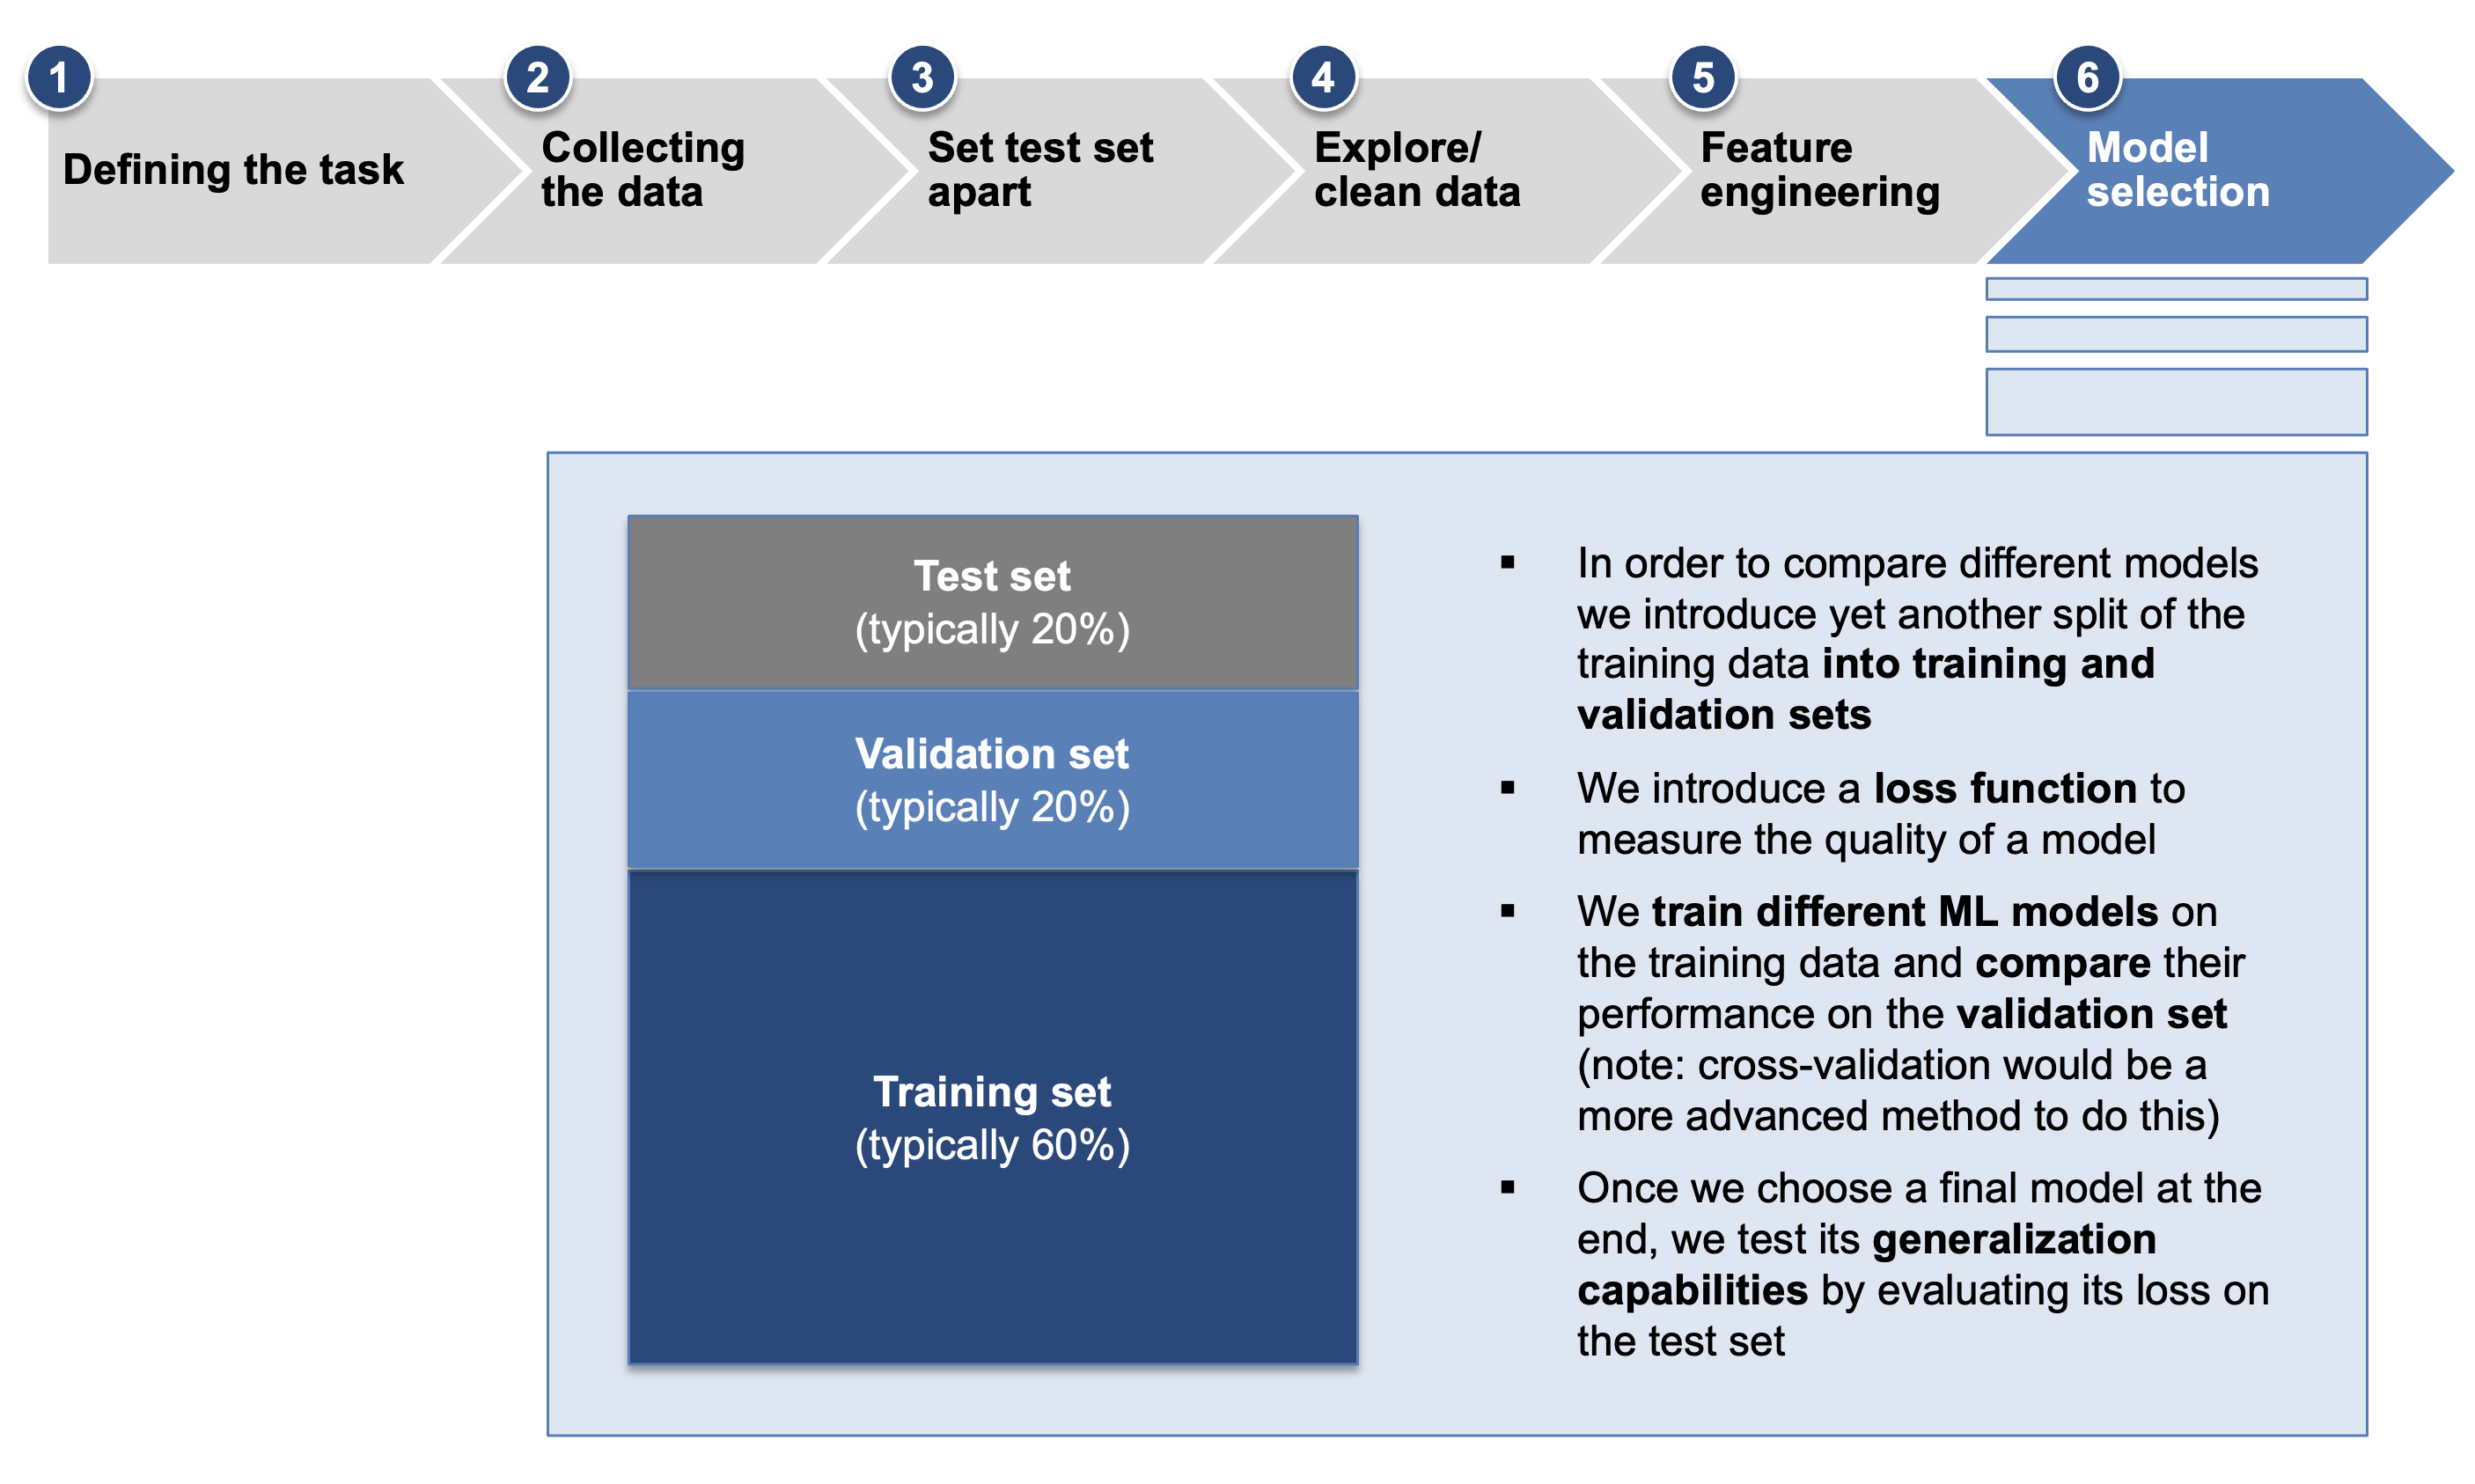

### 6.1: Validation set
In this section we are going to compare some Machine Learning models for our prediction task. In order to decide between them, we need to compare their performance on some test set.

**Discussion question**: Why can we not use our test set for the comparison of the different models?

*Put your answer here.*

Our solution is to introduce yet another test set for this purpose. We call this *validation set*.

In [35]:
train_final, validation = sklearn.model_selection.train_test_split(
    train_processed, train_size=0.8, test_size=0.2, random_state=42)
print('Train:', train_final.shape, 'Test:', validation.shape)

train_labels_final, validation_labels = sklearn.model_selection.train_test_split(
    train_labels, train_size=0.8, test_size=0.2, random_state=42)

Train: (42944, 39) Test: (10737, 39)


In [36]:
train_final

,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,distance,hour_1,hour_2,hour_3,hour_4,hour_5,...,day_2,day_3,day_4,day_5,day_6,weekend_1,period_2,period_3,region_1,region_2
66424,1.454682,0.854239,0.094118,0.090652,0.045738,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1294,-0.767783,-0.219981,0.501505,-0.224741,-0.116668,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
19500,-0.352431,-0.997808,-0.420847,-0.252847,-0.257890,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9366,0.238429,-0.775111,0.843199,0.071010,-0.180218,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1317,-0.821713,-1.049807,-1.460037,-0.752524,-0.752168,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83255,-1.281061,-1.139818,-0.148815,-0.578140,-0.081362,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
62523,-1.716282,-1.692438,-1.659762,-1.836836,-0.709801,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
56470,-0.067172,1.059723,0.484310,0.284199,-0.257890,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
42809,0.123947,-0.228049,0.432725,0.119077,-0.801596,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


Of course this comes at the cost of reducing the size of our training data. A more advanced method to reudce the burden of this effect is *cross validation*.

In [37]:
train_labels_final

66424    1180
1294     1868
19500     975
9366      371
1317      377
         ... 
83255     737
62523     313
56470     463
42809     276
66384     354
Name: duration, Length: 42944, dtype: int64

### 6.2: Define the loss function

We assign `constant_rmse` to the root mean squared error for a constant model that always predicts the mean duration of all training set taxi rides.

In [38]:
def rmse(errors):
    """Return the root mean squared error."""
    return np.sqrt(np.mean(errors ** 2))

constant_rmse = rmse(train_labels_final.values - train_labels_final.mean())
constant_rmse

403.3530008491103

In [39]:
train_labels_final.describe()

count    42944.000000
mean       659.227948
std        403.357697
min         60.000000
25%        361.000000
50%        570.000000
75%        865.000000
max       3598.000000
Name: duration, dtype: float64

### 6.3: Simple linear regression

In this section we train a simple linear regression model on the training data which uses only the distance of the taxi ride as a feature. We compute the root mean squared error on the validation set.

*Terminology Note*: Simple linear regression means that there is only one feature. Multiple linear regression means that there is more than one. In either case, you can use the `LinearRegression` model from `sklearn` to fit the parameters to data.

Before implementing this, let's spend some time to understand the syntax of the Sklearn API which you will also need later. (Source: This text on the Sklearn API is from Géron, Hands-on Machine Learning):

- Estimators. Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is performed by the `fit()` method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the estimation process is considered a hyperparameter (such as an imputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).
- Transformers. Some estimators (such as an imputer) can also transform a dataset; these are called transformers. Once again, the API is quite simple: the transformation is performed by the `transform()` method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for an imputer. All transformers also have a convenience method called `fit_transform()` that is equivalent to calling `fit()` and then `transform()` (but sometimes `fit_transform()` is optimized and runs much faster).
- Predictors. Finally, some estimators are capable of making predictions given a dataset; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: it predicted life satisfaction given a country’s GDP per capita. A predictor has a `predict()` method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions given a test set (and the corresponding labels in the case of supervised learning algorithms).

*Examples*: 
- The standard scaler for numerical data we used is a Sklearn transformer.
- The linear modle we implement in the cell below is a Sklearn predictor.

In [41]:
from sklearn.linear_model import LinearRegression

simple_lin = LinearRegression()

#simple_lin.fit(train_final['distance'].values.reshape(-1,1),train_labels_final.values)
simple_lin.fit(train_final['distance'].to_frame(),train_labels_final.values)
simple_linear_regression_rmse = rmse(validation_labels - simple_lin.predict(validation['distance'].values.reshape(-1,1)))
print('Simple linear regression RMSE: ', simple_linear_regression_rmse)

Simple linear regression RMSE:  283.462466405267


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### 6.4: Multiple linear regression

#### Exercise: 
Fit a multiple linear regression model which uses all variables and compute its RMSE on the validation set.

In [42]:
multiple_lin = LinearRegression()
... 
multiple_linear_regression_rmse = ...
print('Multiple linear regression RMSE: ', multiple_linear_regression_rmse)

Multiple linear regression RMSE:  Ellipsis


### 6.5: Decision tree regression

#### Exercise: 
Fit a decision tree regression model which uses all variables and compute its RMSE on the validation set.

In [43]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor()
...
decision_tree_regression_rmse = ...
print('Decision tree regression RMSE: ', decision_tree_regression_rmse)

Decision tree regression RMSE:  Ellipsis


### 6.6: Model selection and evaluation
#### Exercise:
Based on the three models we tried, which is the model we prefer? Make an estimation of the generalization error by evaluation this model on the test set.

In [44]:
test_rmse = rmse(test_labels - multiple_lin.predict(test_processed))
print('Estimation of generalization RMSE: ', test_rmse)

NotFittedError: ignored

International Spring School

